# `NumericalSgps` an introduction - SSC 2023

In [2]:
LoadPackage("num");

true

## Gluings of numerical semigroups

Let $S_1$ and $S_2$ be numerical semigroups, and let $a_1\in S_2$ and $a_2\in S_1$ (none of them a minimal generator). Then $S=a_1 S_1+a_2 S_2$ is again a numerical semigroup, and if $A_1$ and $A_2$ are the minimal generating systems of $S_1$ and $S_2$, respectively, $a_1A_1\cup a_2A_2$ is a minimal generating system of $S$.

In this case, we say that $S$ is a gluing of $S_1$ and $S_2$. 

In [3]:
s:=NumericalSemigroup(4,6,9);;

In [4]:
MinimalGenerators(s);

[ 4, 6, 9 ]

In [5]:
AsGluingOfNumericalSemigroups(s);

[ [ [ 4 ], [ 6, 9 ] ], [ [ 4, 6 ], [ 9 ] ] ]

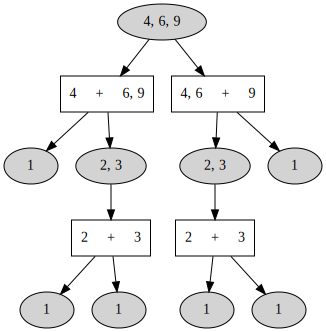

In [6]:
JupyterSplashDot(DotTreeOfGluingsOfNumericalSemigroup(s));

### Free numerical semigroups

A numerical semigroup $S$ minimally generated by $\{n_1,\dots,n_e\}$ is free for this arrangment of its minimal generators if either $\mathbb{N}$ or $S=d\langle n_1/d,\dots,n_{e-1}/d\rangle+ n_e\mathbb{N}$ is a gluing with $d=\gcd\{n_1,\dots,n_{e-1}\}$ and $\langle n_1/d,\dots,n_{e-1}/d\rangle$ is free.

A numerical semigroup might be free for different arrangments of its minimal generators, but does not have to be free for all the arrangments of its minimal generators.

In [8]:
s:=NumericalSemigroup(4,6,9);;
IsFree(s);

true

In [9]:
IsUniversallyFree(s);

false

In [11]:
s:=NumericalSemigroup(6,10,15);;
IsUniversallyFree(s);

true

### Exercise

Prove that this definition agrees with the definition of free numerical semigroup given in Section 2.3 of our book.

### Telescopic numerical semigroups

A numerical semigroup $S$ minimally generated by $\{n_1<\dots<n_e\}$ is telescopic if it is free for the arrangment $(n_1,\dots,n_e)$. 

In [13]:
s:=NumericalSemigroup(4,6,9);;
IsTelescopic(s);

true

Suppose that $S$ is telescopic and define $d_i=\gcd\{n_1,\dots,n_{i-1}\}$ and $e_i=d_i/d_{i+1}$. Then $S$ is the semigroup associated to a plane curve singularity if and only if $e_in_i<n_{i+1}$ for all $i$.

In [19]:
NumSgpsUseSingular();
x:=X(Rationals,"x");; y:=X(Rationals,"y");;
f:= y^4-2*x^3*y^2-4*x^5*y+x^6-x^7;;
s:=SemigroupOfValuesOfPlaneCurve(f);
MinimalGenerators(s);

true

<Numerical semigroup with 3 generators>

[ 4, 6, 13 ]

In [20]:
IsTelescopic(s);

true

In [21]:
IsNumericalSemigroupAssociatedIrreduciblePlanarCurveSingularity(s);

true

In [23]:
LoadPackage("jupyterviz");

true

In [25]:
is:=[0..60];;
Plot([is,i->Length(CompleteIntersectionNumericalSemigroupsWithFrobeniusNumber(2*i+1))],
[is, i->Length(FreeNumericalSemigroupsWithFrobeniusNumber(2*i+1))],
[is, i->Length(TelescopicNumericalSemigroupsWithFrobeniusNumber(2*i+1))]);


### Apéry sets and gluings

Assume that $S=a_1S_1+a_2S_2$ is a gluing of $S_1$ and $S_2$. Then 

$$
\operatorname{Ap}(S,a_1a_2)=a_1\operatorname{Ap}(S_1,a_2)+a_2\operatorname{Ap}(S_2,a_1).
$$

In particular, 

$$
\operatorname{F}(S)=a_1\operatorname{F}(S_1)+a_2\operatorname{F}(S_2)+a_1a_2,
$$

and 

$$
\operatorname{t}(S)=\operatorname{t}(S_1)\operatorname{t}(S_2).
$$

In particular, the gluing of two symmetric numerical semigroups is symmetric, and every complete intersection is a symmetric numerical semigroup.

In [28]:
s:=NumericalSemigroup(16,24,20,25);

<Numerical semigroup with 4 generators>

In [29]:
IsSymmetric(s);

true

In [30]:
AsGluingOfNumericalSemigroups(s);

[ [ [ 16, 20, 24 ], [ 25 ] ], [ [ 16, 24 ], [ 20, 25 ] ] ]

#### Exercise

Find symmetric numerical semigroups that are not a gluing of two symmetric numerical semigroups.

### Hilbert series (or generating functions) and gluings

Let $S$ be a numerical semigroup. The Hilbert series associated to $S$ is the formal series
$$
H_S(x)= \sum_{s\in S} x^s.
$$
Also, for every $n\in S\setminus\{0\}$
$$
H_S(x)= \frac{1}{1-x^n} \sum_{w\in \operatorname{Ap}(S,n)} x^w.
$$

Thus, if $S=a_1S_1+a_2S_2$ is a gluing, then 
$$
H_S(x) = (1-x^{a_1a_2})H_{S_1}(x^{a_1})H_{S_2}(x^{a_2}).
$$

Define the polynomial associated to $S$ as 
$$
P_S(x) = (1-x)H_S(x)= 1+(1-x)\sum_{g\in \mathbb{N}\setminus S} x^g.
$$

In [32]:
s:=NumericalSemigroup(4,6,9);;
p:=NumericalSemigroupPolynomial(s,x);

x^12-x^11+x^8-x^7+x^6-x^5+x^4-x+1

In [33]:
Print(p);

x^12-x^11+x^8-x^7+x^6-x^5+x^4-x+1

A numerical semigroup is *cyclotomic* if $P_S(x)$ is a product of cyclotomic polynomials. 

For every numerical semigroup $S$, the polynomial $P_S(x)$ can be expressed in the following form (uniquely)
$$
P_S(x)= \prod_{d\in \mathbb{N}\setminus\{0\}}(1-x^d)^{e_d}.
$$
The sequence $(e_1,e_2,\dots)$ is known as the cyclotomic exponent sequence associated to $S$.

In [34]:
CyclotomicExponentSequence(s,40);

[ 1, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 1 ]

In [35]:
WittCoefficients(p,40);

[ 1, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

The numerical semigroup $S$ is cyclotomic if and only if its cyclotomic exponent sequence has finite support.

In [38]:
s:=NumericalSemigroup(3,5,7);;
p:=NumericalSemigroupPolynomial(s,x);;
WittCoefficients(p,150);

[ 1, 0, -1, 0, -1, 0, -1, 0, 0, 1, 0, 1, 0, 1, 0, 0, -1, 0, -1, 0, 0, 1, 0,   1, 0, 1, -1, 0, -2, 0, -2, 1, -1, 3, 0, 3, -1, 3, -3, 1, -5, 1, -5, 3, -3,   7, -2, 8, -4, 7, -9, 4, -14, 6, -14, 12, -10, 22, -9, 25, -16, 23, -30, 17,   -42, 23, -43, 41, -36, 66, -37, 76, -60, 73, -100, 66, -133, 91, -139, 148,   -129, 219, -146, 252, -222, 252, -340, 255, -438, 346, -469, 524, -473,   731, -564, 846, -820, 887, -1183, 973, -1488, 1309, -1635, 1889, -1756,   2530, -2157, 2947, -3026, 3214, -4181, 3701, -5187, 4922, -5839, 6834,   -6563, 8905, -8200, 10467, -11195, 11807, -14992, 14052, -18463, 18510,   -21237, 24982, -24675, 31960, -31101, 37904, -41573, 43905, -54450, 53343,   -66840, 69606, -78312, 91968, -93176, 116272, -117909, 139142, -155059,   164573, -199918, 202659, -245305, 262345 ]

#### Open problem

We do not know if every cyclotomic semigroup is a gluing of two cyclotomic semigroups.

## Minimal presentations

In mathematics many algebraic objects are given by means of (free) generators and some relations among them. For numerical semigroups it is sometimes useful to have representation of this form.

Let $S$ be a numerical semigroup minimally generated by $\{n_1,\dots,n_e\}$. Every element $s\in S$ admits an expression of the form $s=a_1n_1+\dots+ a_e n_e$, and for every $(a_1,\dots,a_e)\in \mathbb{N}^e$, the integer $a_1n_1+\dots+a_en_e\in S$. Thus, the following (monoid) morphism 
$$
\varphi_S: \mathbb{N}^e \to S,\ \varphi_S(a_1,\dots,a_e)=a_1n_1+\dots+a_en_e
$$
is surjective. There is an isomorphism theorem for monoids, and consequently we have that $\mathbb{N}^e/\ker \varphi_S$ is isomorphic to $S$ as a monoid, where $\ker \phi_S=\{ (a,b)\in \mathbb{N}^e : \varphi_S(a)=\varphi_S(b)\}$. As a congruence, $\ker \varphi_S$ admints a system of generators, which is known as a presentation for $S$. 

A minimal presentation for $S$ is just a minimal generating system of $\ker \varphi_S$.

In [39]:
s:=NumericalSemigroup(2,3);

<Numerical semigroup with 2 generators>

In [40]:
MinimalPresentation(s);

[ [ [ 0, 2 ], [ 3, 0 ] ] ]

Thus $\langle 2,3\rangle$ can be viewed as the monoid generated by $a$ and $b$, which fulfil the relation $3a=2b$. 

Given $s\in S$, the set $\varphi_S^{-1}(s)$ corresponds to all the expressions that $s$ migh have in terms of the minimal generators of $S$. We will call this set, the set of factorizations of $s$, and we will denote it by $\mathsf{Z}(s)$.

In [41]:
Factorizations(6,s);

[ [ 3, 0 ], [ 0, 2 ] ]

In [42]:
Factorizations(20,s);

[ [ 10, 0 ], [ 7, 2 ], [ 4, 4 ], [ 1, 6 ] ]

A set $\rho$ generates a congruence $\sigma$ on $\mathbb{N}^e$ if for any pair $(a,b)\in \sigma$ there exists a chain $a_1,\dots,a_n$ such that

- $a_1=a$, $a_n=b$,
- for all $i$, there exists $c_i\in \mathbb{N}^e$ and $(\alpha_i,\beta_i)$ such that $(a_i,a_{i+1})=(\alpha_i+c_i,\beta_i+c_i)$ and either $(\alpha_i,\beta_i)\in \rho$ or $(\beta_i,\alpha_i)\in \rho$.

You can see the sequence $a_1,\dots,a_n$ as a chain of transformations from $a$ to $b$, and at each step we are applying a relation (or trade) chanbe $\alpha_i$ by $\beta_i$ (or viceversa). 

For instance, in the above example $((10,0),(1,6))\in \ker\varphi_S$. We start with $(10,0)$ and apply the only minimal relation we have on our numerical semigroup: $((10,0),(10-3,2))\in \sigma$. If we do this a couple of times more, we obtain the chaing $(10,0)$, $(7,2)$, $(4,4)$, and $(1,6)$. 

In [44]:
s:=NumericalSemigroup(3,5,7);;
MinimalPresentation(s);

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ],   [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

In [45]:
Factorizations(20,s);

[ [ 5, 1, 0 ], [ 0, 4, 0 ], [ 1, 2, 1 ], [ 2, 0, 2 ] ]

Assume that we want to check that $((5,1,0),(2,0,2))$ can be obtained from the minimal relations of $S$. Notice that these two factorizations have some common support, in fact $(5,1,0)=(3,1,0)+(2,0,0)$ and $(2,0,2)=(0,0,2)+(2,0,0)$. Thus, if we find a chain going from $(3,1,0)$ to $(0,0,2)$, then by adding $(2,0,0)$ to all the steps, we obtain a chain connecting our original factorizations.  But we already have this chain, since $((0,0,2),(3,1,0))$ is already in our minimal presentation.

The idea can be extended to factorizations of larger elements in $S$. Whenever they have a common "factor", remove it, and try to connect the new factorizations. This motivates the definition of $\mathcal{R}$-classes. 

Let $X$ be a subset of $\mathbb{N}^e$. We say that $x,y\in X$ are connected if there exists a sequence $x_1,\dots,x_n\in X$ (for some $n\in\mathbb{N}$) such that 

- $x_1=x$, $x_n=y$,
- for every $i$, $x_i$ and $x_{i+1}$ have common support.

The connected components of $X$ under this relation are called $R$-classes of $X$.

In [46]:
Length(RClassesOfSetOfFactorizations(Factorizations(20,s)));

1

The idea is that whenever we are in the same $R$-class, we can connect any two factorizations with a chain where two consequtive elements have common support. For these two elements, we remove the common part, moving now to the factorizations of an element smaller than the original one. If these two new factorizations are in the same $R$-class, we repeat the process. This will end when we arrive at factorizations in different $R$-classes, and then we only have to connect all the chains that we found translated accordingly. 

Let us illustrate this with an example.

In [47]:
Factorizations(21,s);

[ [ 7, 0, 0 ], [ 2, 3, 0 ], [ 3, 1, 1 ], [ 0, 0, 3 ] ]

In [48]:
RClassesOfSetOfFactorizations(Factorizations(21,s));

[ [ [ 0, 0, 3 ], [ 2, 3, 0 ], [ 3, 1, 1 ], [ 7, 0, 0 ] ] ]

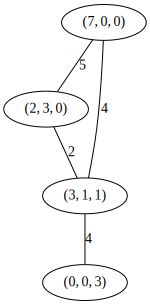

In [49]:
JupyterSplashDot(DotEliahouGraph(Factorizations(21,s)));

We know that $((7,0,0),(0,0,3))\in \ker\varphi_S$, and we want to see how can we obtain this pair from the minimal relations of $S$. Both $(7,0,0)$ and $(0,0,3)$ are in the same $R$-class. We can, instance, connect them with the sequence $(7,0,0)$, $(3,1,1)$, $(0,0,3)$. By transitivity, if we find a chain of trades going from  $(7,0,0)$  to $(3,1,1))$ and another from $(3,1,1)$ to $(0,0,3)$, by joining them we will find a chain from $(7,0,0)$ to $(0,0,3)$. 

By removing the common part of $(7,0,0)$ and $(3,1,1)$, we obtain $(4,0,0)$ and $(0,1,1)$, and the pair $((4,0,0),(0,1,1))$ is in our minimal presentation. We do the same with $(3,1,1)$ and $(0,0,3)$, obtaining $(3,1,0)$ and $(0,0,2)$, and $((0,0,2),(3,1,0))$ is in our minimal presentation. Let $\sigma=\ker\varphi_S$. Then $(7,0,0)=((4,0,0)+(3,0,0))\sigma ((0,1,1)+(3,0,0))=(3,1,1)\sigma ((3,1,0)+(0,0,1))\sigma ((0,0,2)+(0,0,1))=(0,0,3)$.

In this construction, elements with more than one $R$-class are crucial. These elements are called Betti elements (or degrees) of $S$.

In [50]:
bs:=BettiElements(s);

[ 10, 12, 14 ]

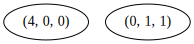

In [53]:
JupyterSplashDot(DotEliahouGraph(Factorizations(12,s)));

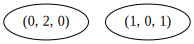

In [54]:
JupyterSplashDot(DotEliahouGraph(Factorizations(10,s)));

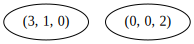

In [55]:
JupyterSplashDot(DotEliahouGraph(Factorizations(14,s)));

In [56]:
MinimalPresentation(s);

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ],   [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

In [51]:
List(bs,b-> RClassesOfSetOfFactorizations(Factorizations(b,s)));

[ [ [ [ 0, 2, 0 ] ], [ [ 1, 0, 1 ] ] ], [ [ [ 4, 0, 0 ] ], [ [ 0, 1, 1 ] ] ],   [ [ [ 3, 1, 0 ] ], [ [ 0, 0, 2 ] ] ] ]

It is not hard to prove that if $s\in S$ is a Betti element, then $s=n_i+w$ with $i>2$ and $w\in \operatorname{Ap}(S,n_1)$. Thus the number of Betti elements is finite. As a consequence of this, all minimal presentations have the same cardinality, since we only need relations "connecting" different $R$-classes of the factorizations of the Betti elements of $s$. This also provides a way do determine all minimal relations of a numerical semigroup (up to symmetry).

In [52]:
AllMinimalRelationsOfNumericalSemigroup(s);

[ [ [ 1, 0, 1 ], [ 0, 2, 0 ] ], [ [ 3, 1, 0 ], [ 0, 0, 2 ] ],   [ [ 4, 0, 0 ], [ 0, 1, 1 ] ] ]

Minimal presentations of numerical semigroups with embedding dimension two have cardinality one. Thos for embedding dimension three have cardinality two or three. There are numerical semigroups with embedding dimension four with arbitrarily large minimal presentations.